In [1]:
#Importing the Libraries

import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Input, Lambda, Flatten, Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img


In [2]:
#Resize all the image to (224,224)

IMAGE_SIZE = [224,224]

train_path = '/content/drive/MyDrive/Colab Notebooks/cotton disease/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/cotton disease/test'

In [3]:
#Using imagenet weights for training the model, 
#Not including the top layer and input_shape will be (224,224,3)

resnet = ResNet50(input_shape = IMAGE_SIZE +[3],weights='imagenet',include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [4]:
#Not training the existing weights 
for layer in resnet.layers:
    layer.trainable = False

In [5]:
#No of output classe 
folders = glob('/content/drive/MyDrive/Colab Notebooks/cotton disease/train/*')
folders

['/content/drive/MyDrive/Colab Notebooks/cotton disease/train/diseased cotton leaf',
 '/content/drive/MyDrive/Colab Notebooks/cotton disease/train/fresh cotton plant',
 '/content/drive/MyDrive/Colab Notebooks/cotton disease/train/fresh cotton leaf',
 '/content/drive/MyDrive/Colab Notebooks/cotton disease/train/diseased cotton plant']

In [6]:
#Flattening the layer so that we can add the last layer based on the catgeory of outputs
x=Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders),activation='softmax')(x)

model=Model(inputs=resnet.inputs,outputs=prediction,name='cotton_disease_prediction_model')

#Model structure
model.summary()

Model: "cotton_disease_prediction_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________

In [8]:
#Compiling the model with cost and optimizers
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy']
             )

In [9]:

#Data Augmentation using the ImageDataGenerator on the train Dataset

train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:

training_dataset=train_datagen.flow_from_directory(train_path,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical')

test_dataset=test_datagen.flow_from_directory(test_path,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 1951 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [11]:
pred_model=model.fit_generator(training_dataset,
                              validation_data=test_dataset,
                              epochs=20,
                              steps_per_epoch=len(training_dataset),
                              validation_steps=len(test_dataset))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


61/61 [==============================] - 1115s 18s/step - loss: 3.5982 - accuracy: 0.3881 - val_loss: 1.6915 - val_accuracy: 0.4245
Epoch 2/20
61/61 [==============================] - 37s 600ms/step - loss: 1.1294 - accuracy: 0.5805 - val_loss: 2.1464 - val_accuracy: 0.3868
Epoch 3/20
61/61 [==============================] - 37s 602ms/step - loss: 1.4470 - accuracy: 0.5204 - val_loss: 0.9829 - val_accuracy: 0.6321
Epoch 4/20
61/61 [==============================] - 36s 590ms/step - loss: 0.8399 - accuracy: 0.6593 - val_loss: 0.8430 - val_accuracy: 0.6415
Epoch 5/20
61/61 [==============================] - 36s 590ms/step - loss: 0.7864 - accuracy: 0.6910 - val_loss: 0.8893 - val_accuracy: 0.6321
Epoch 6/20
61/61 [==============================] - 36s 590ms/step - loss: 0.7526 - accuracy: 0.7038 - val_loss: 0.7724 - val_accuracy: 0.7170
Epoch 7/20
61/61 [==============================] - 36s 592ms/step - loss: 0.8262 - accuracy: 0.6574 - val_loss: 0.7834 - val_accuracy: 0.6604
Epoch 8/20

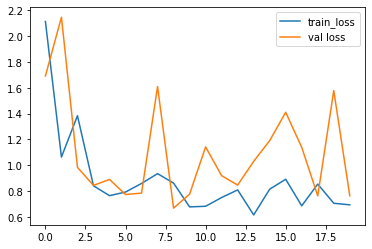

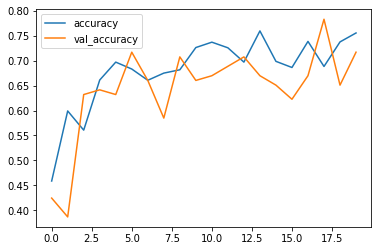

<Figure size 432x288 with 0 Axes>

In [12]:
#Plotting the loss and accuracy 
plt.plot(pred_model.history['loss'],label='train_loss')
plt.plot(pred_model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(pred_model.history['accuracy'],label='accuracy')
plt.plot(pred_model.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.savefig('accuracyVal_accuracy')

In [14]:
#Saving model to h5 file 
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Colab Notebooks/cotton disease/resnet50_model.h5')

In [15]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model=load_model('resnet50_model.h5')

img = image.load_img('/content/drive/MyDrive/Colab Notebooks/cotton disease/val/diseased cotton leaf/dis_leaf (100)_iaip.jpg',target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
model.predict(img_data)
a=np.argmax(model.predict(img_data), axis=1)

In [16]:
model.predict(img_data)

array([[8.6821200e-07, 4.6421184e-37, 9.9999917e-01, 3.5070532e-28]],
      dtype=float32)

In [17]:
a

array([2])